In [1]:
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats

def show_time_lines(title, x_label, y_label, x_values, y_values, 
                    regression='yes', mv_amt_1=0, mv_amt_2=0, 
                    alpha_1=0, alpha_2=0, 
                    size=()):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    if size != ():
        figure = plt.figure(figsize=size)

    last = []
    plt.xticks(x_values)
        
    # First show the data line.
    plt.plot(x_values, y_values, linewidth=5)
    
    last_1 = []
    last_2 = []
    linear_line   = []
    mv_avg_line_1 = []
    mv_avg_line_2 = []
    smooth_line_1 = []
    smooth_line_2 = []

    if regression == 'yes':
        linear_regression = stats.linregress(x=x_values,
                                             y=y_values)
        m = linear_regression.slope
        b = linear_regression.intercept

    
    # Calculate the least squares trend line, 
    # the simple moving average line,
    # and the exponentially smoothed line.
    for i in range(len(x_values)):
        x = x_values[i]
        y = y_values[i]
        
        # Linear line
        if regression == 'yes': 
            y_hat = m*x + b
            linear_line.append(y_hat)
        
        # Moving average line #1
        if mv_amt_1 != 0:
            last_1.append(y)
            
            if len(last_1) == mv_amt_1:
                mv_avg_line_1.append(stat.mean(last_1))
                last_1.pop(0)
        
        # Moving average line #2
        if mv_amt_2 != 0:
            last_2.append(y)
            
            if len(last_2) == mv_amt_2:
                mv_avg_line_2.append(stat.mean(last_2))
                last_2.pop(0)

        # Exponentially smoothed line #1
        if alpha_1 != 0:
            if i == 0:
                y_smooth_1 = y
            else:
                y_smooth_1 = alpha_1*y + (1 - alpha_1)*y_smooth_1
                
            smooth_line_1.append(y_smooth_1)
                 
        # Exponentially smoothed line #2
        if alpha_2 != 0:
            if i == 0:
                y_smooth_2 = y
            else:
                y_smooth_2 = alpha_2*y + (1 - alpha_2)*y_smooth_2
                
            smooth_line_2.append(y_smooth_2)

    if regression == 'yes':
        plt.plot(xs, linear_line, color='red')
    
    if mv_amt_1 != 0:
        plt.plot(xs[mv_amt_1 - 1:], mv_avg_line_1, color='lightgreen')
    
    if mv_amt_2 != 0:
        plt.plot(xs[mv_amt_2 - 1:], mv_avg_line_2, color='green')
        
    if alpha_1 != 0:
        plt.plot(xs, smooth_line_1, color='gray', linestyle='--')
        
    if alpha_2 != 0:
        plt.plot(xs, smooth_line_2, color='black', linestyle='--')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

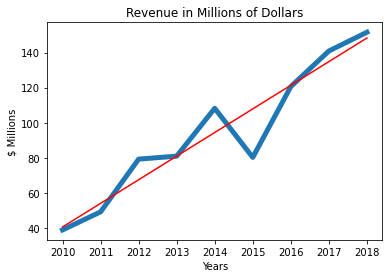

In [2]:
xs = list(range(2010, 2019))
ys = [38.8, 49.1, 79.2, 80.9, 108.2, 80.2, 120.6, 140.9, 151.6]

show_time_lines('Revenue in Millions of Dollars', 'Years', '$ Millions', xs, ys)

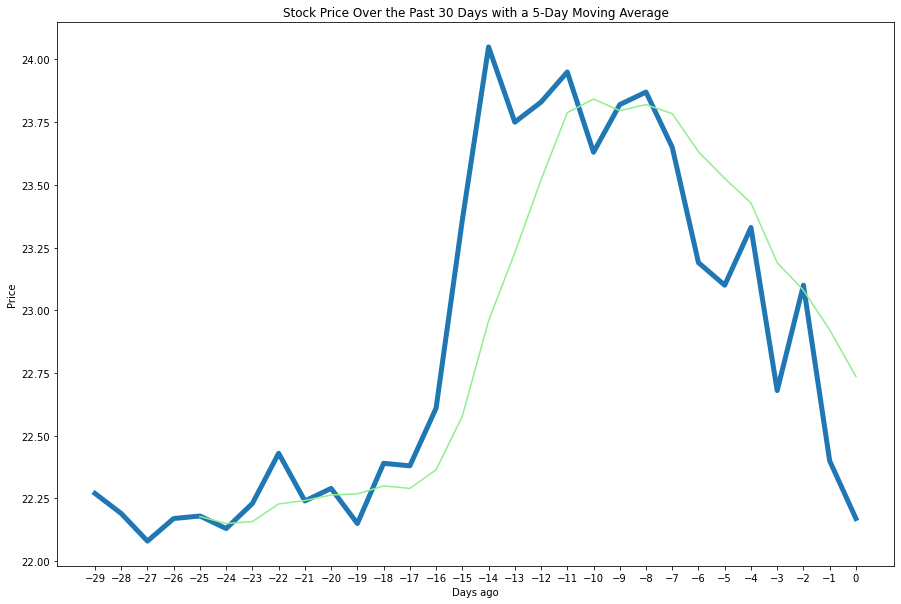

In [3]:
xs = list(range(-29, 1, 1))
ys = [22.27, 22.19, 22.08, 22.17, 22.18, 22.13, 22.23, 22.43, 22.24, 22.29, 
      22.15, 22.39, 22.38, 22.61, 23.36, 24.05, 23.75, 23.83, 23.95, 23.63, 
      23.82, 23.87, 23.65, 23.19, 23.10, 23.33, 22.68, 23.10, 22.40, 22.17]

show_time_lines('Stock Price Over the Past 30 Days with a 5-Day Moving Average', 
                'Days ago', 'Price', xs, ys, 
                regression='no', mv_amt_1=5, size=(15, 10))

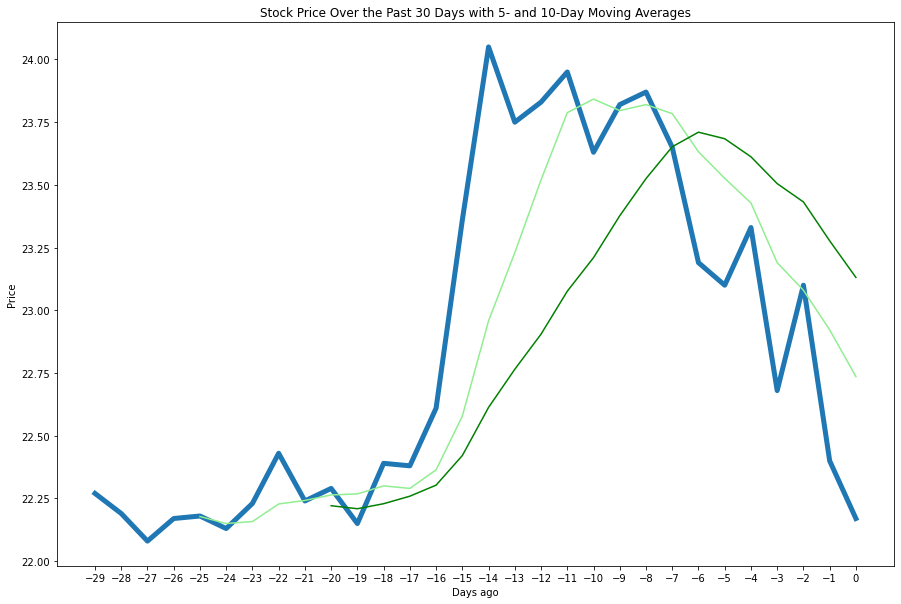

In [4]:
xs = list(range(-29, 1, 1))
ys = [22.27, 22.19, 22.08, 22.17, 22.18, 22.13, 22.23, 22.43, 22.24, 22.29, 
      22.15, 22.39, 22.38, 22.61, 23.36, 24.05, 23.75, 23.83, 23.95, 23.63, 
      23.82, 23.87, 23.65, 23.19, 23.10, 23.33, 22.68, 23.10, 22.40, 22.17]

show_time_lines('Stock Price Over the Past 30 Days with 5- and 10-Day Moving Averages', 
                'Days ago', 'Price', xs, ys, 
                regression='no', mv_amt_1=5, mv_amt_2=10, size=(15, 10))

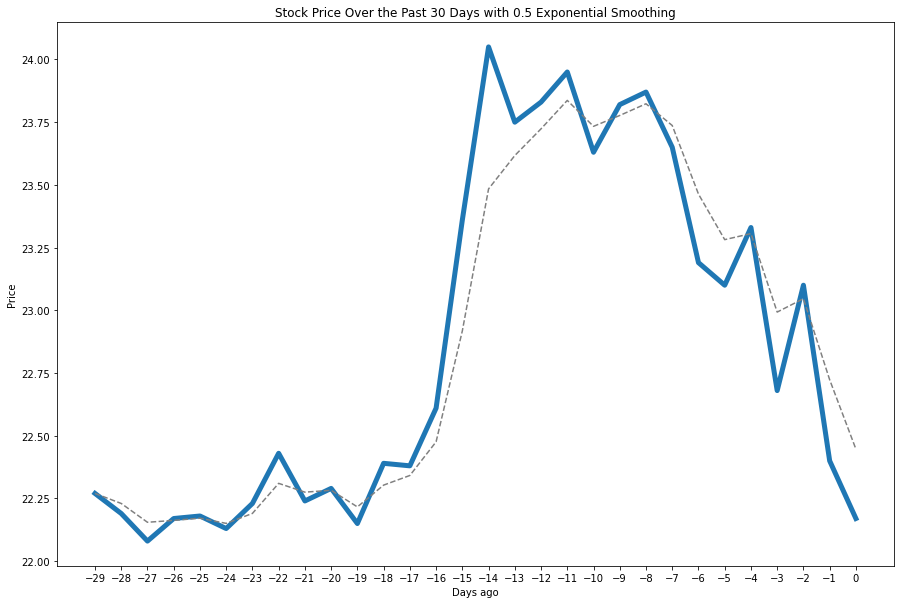

In [5]:
xs = list(range(-29, 1, 1))
ys = [22.27, 22.19, 22.08, 22.17, 22.18, 22.13, 22.23, 22.43, 22.24, 22.29, 
      22.15, 22.39, 22.38, 22.61, 23.36, 24.05, 23.75, 23.83, 23.95, 23.63, 
      23.82, 23.87, 23.65, 23.19, 23.10, 23.33, 22.68, 23.10, 22.40, 22.17]

show_time_lines('Stock Price Over the Past 30 Days with 0.5 Exponential Smoothing', 
                'Days ago', 'Price', xs, ys, 
                regression='no', alpha_1=0.5, size=(15, 10))

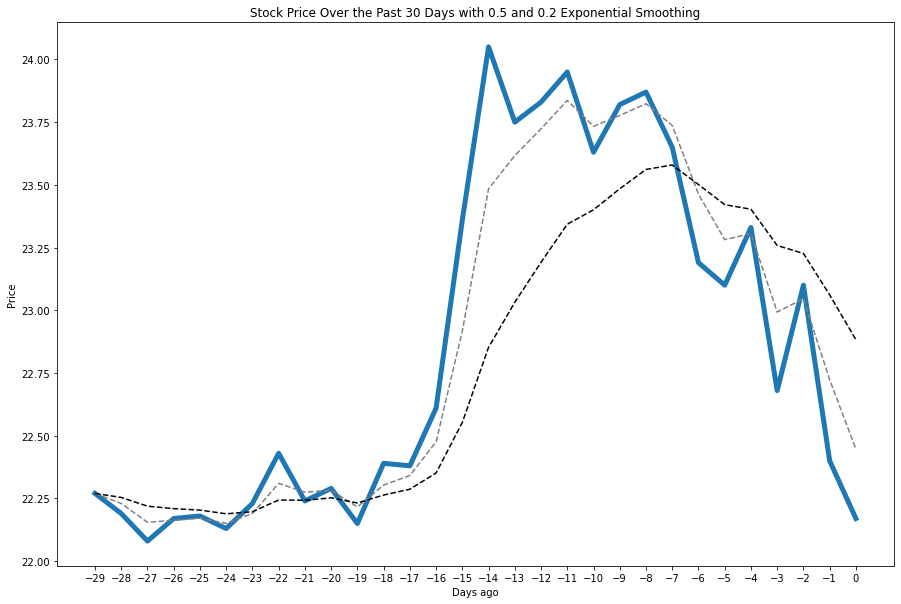

In [6]:
xs = list(range(-29, 1, 1))
ys = [22.27, 22.19, 22.08, 22.17, 22.18, 22.13, 22.23, 22.43, 22.24, 22.29, 
      22.15, 22.39, 22.38, 22.61, 23.36, 24.05, 23.75, 23.83, 23.95, 23.63, 
      23.82, 23.87, 23.65, 23.19, 23.10, 23.33, 22.68, 23.10, 22.40, 22.17]

show_time_lines('Stock Price Over the Past 30 Days with 0.5 and 0.2 Exponential Smoothing', 
                'Days ago', 'Price', xs, ys, 
                regression='no', alpha_1=0.5, alpha_2=0.2, size=(15, 10))

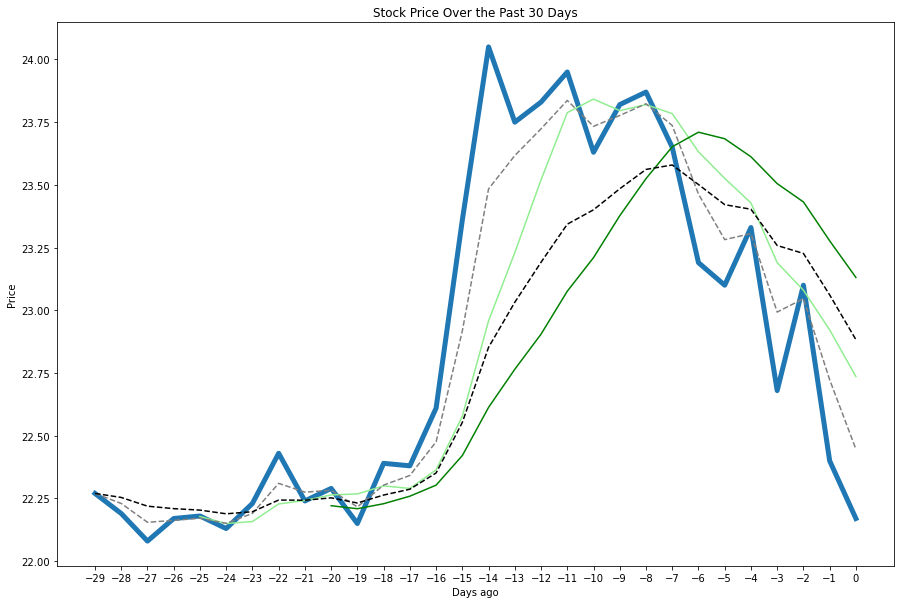

In [7]:
xs = list(range(-29, 1, 1))
ys = [22.27, 22.19, 22.08, 22.17, 22.18, 22.13, 22.23, 22.43, 22.24, 22.29, 
      22.15, 22.39, 22.38, 22.61, 23.36, 24.05, 23.75, 23.83, 23.95, 23.63, 
      23.82, 23.87, 23.65, 23.19, 23.10, 23.33, 22.68, 23.10, 22.40, 22.17]

show_time_lines('Stock Price Over the Past 30 Days', 
                'Days ago', 'Price', xs, ys, 
                mv_amt_1=5, mv_amt_2=10, 
                regression='no', alpha_1=0.5, alpha_2=0.2, size=(15, 10))